In [19]:
import numpy as np
import matplotlib.pyplot as plt

def generateStepArray(trajectory, stepSize):
    stepTrajectory = np.array(trajectory) / stepSize #calculates trajectory in number of steps
    relativeSteps = np.zeros(len(trajectory))
    if (np.abs(stepTrajectory[:-1] - stepTrajectory[1:]) > 1).any():
        print("error, trajectory is not fine enough")
        return -1
    else:
        #np.round(trajectory[1:] - trajectory[:-1]) this won't work...
        for i in range(len(stepTrajectory)):
            if stepTrajectory[i] - np.sum(relativeSteps) >= 1:
                relativeSteps[i] = 1
            elif stepTrajectory[i] - np.sum(relativeSteps) <= -1:
                relativeSteps[i] = -1
    return relativeSteps

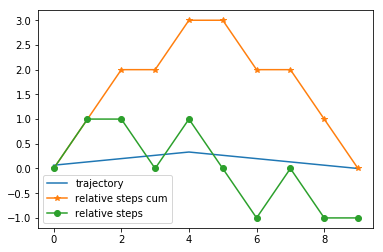

In [36]:
trajectory = np.append(np.cumsum(np.ones(5))/15, 5/15 + np.cumsum(np.ones(5))/15*-1)
relativeSteps = generateStepArray(trajectory, 0.1)

plt.figure()
plt.plot(trajectory)
plt.plot(np.cumsum(relativeSteps), '*-')
plt.plot(relativeSteps, 'o-')
plt.legend(['trajectory', 'relative steps cum', 'relative steps'])
plt.show()